## Example intial data exploration and data quality check

In [40]:
import pandas as pd              # This imports functionality for working with data tables
import pathlib                   # Mainly used to navigate the folder structure on your computer
import matplotlib                # This import backends used for plotting
from matplotlib import pyplot as plt
from ipyleaflet import Map, basemaps, basemap_to_tiles, Marker, MarkerCluster # This imports the mapping functionality

### Context

Our team been commissioned to identify and quantify the factors that lead to more positive outcomes after a crime has been reported in the City of London. Here, we have been tasked with running a data quality audit to see if the data is suitable for our team's task. 

For this proof-of-concept we are just going to use the public data from July 2019 sourced from [data.police.uk](https://data.police.uk/data/). Using this smaller dataset allows us to quickly look closely at the data while still identifying potential data quality issues. 

Our six dimensions of data quality are:
- Valid 
- Unique
- Complete
- Timely
- Accurate
- Consistent

We can already say the data is out of date, so not **timely**, as the data reporting methods might have changed since 2019.

### Import the data

Lets start by finding the path to the data files in a portable way. We can use the `pathlib` module to do this. 

In [41]:
notebook_folder = pathlib.Path.cwd() # This sets the notebook folder as the working directory. Everything will be saved relative to this folder
data_folder = notebook_folder / 'data' # This sets the data folder as a subfolder of the notebook folder. Pathlib overloads the / operator to do this
data_folder

PosixPath('/Users/kurtcormack/Documents/City of London Police data analysis/data')

Read in the data from the CSV file using the `read_csv()` function from the `pandas` library. 

In [42]:
outcomes_data = pd.read_csv(data_folder / '2019-07-city-of-london-outcomes.csv')

### Check what data we have
Is it valid? Is it complete?

We can use the `info()` method to get a quick overview of the data, its data types and the number of non-null values in each column.

In [43]:
outcomes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Crime ID      649 non-null    object 
 1   Month         649 non-null    object 
 2   Reported by   649 non-null    object 
 3   Falls within  649 non-null    object 
 4   Longitude     616 non-null    float64
 5   Latitude      616 non-null    float64
 6   Location      649 non-null    object 
 7   LSOA code     616 non-null    object 
 8   LSOA name     616 non-null    object 
 9   Outcome type  649 non-null    object 
dtypes: float64(2), object(8)
memory usage: 50.8+ KB


Now lets look at the start of the data using the DataFrame's `head()` method.

In [44]:
outcomes_data.head(5)

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d916bdd10349bec542af76fca46dba9cd0bea4a0c522ef...,2019-07,City of London Police,City of London Police,-0.080478,51.527164,On or near Nightclub,E01033708,Hackney 027G,Suspect charged
1,7c09a5d829ed8e8a8471d5226a7f7d05b60c86db329182...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning
2,7bcf63778a38f648ea025036ba2688a13891d276776acd...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
3,c8c87a0bc67dffb3a8fd1b73b909d5ea3e59f1984a5c34...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
4,db2af2273cebcbd38278fcd8972a35340d22d3d7a482bc...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


### Unique crime ID's?
Is the data valid? Is it unique?

We can look at the number of unique values in the `Crime ID` column using the `nunique()` method.

In [45]:
outcomes_data['Crime ID'].nunique()

640

Are the duplicates consistent?

Now we have seen that there are duplicates, we can use the `duplicated()` method to return a Series of binary values indicating whether each row is a duplicate or not. We can then use this to filter the DataFrame to only show the duplicate rows. Lastly, we can sort the DataFrame by the `Crime ID` column to see if the duplicates are consistent.

In [46]:
outcomes_data[outcomes_data.duplicated('Crime ID', keep=False)].sort_values('Crime ID')

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
65,0a3764a348c726e247dab6cf2496d7a8f6e9c693fc873b...,2019-07,City of London Police,City of London Police,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Suspect charged
66,0a3764a348c726e247dab6cf2496d7a8f6e9c693fc873b...,2019-07,City of London Police,City of London Police,-0.074901,51.506255,On or near A100,E01004293,Tower Hamlets 027B,Suspect charged
26,3868530a9b13902da68f52b661a39ef954b35108075f12...,2019-07,City of London Police,City of London Police,-0.083296,51.517058,On or near OLD BROAD STREET,E01032739,City of London 001F,Suspect charged
27,3868530a9b13902da68f52b661a39ef954b35108075f12...,2019-07,City of London Police,City of London Police,-0.083296,51.517058,On or near OLD BROAD STREET,E01032739,City of London 001F,Suspect charged
56,7d900e9f31ec2167b26d284004b78474d8ee5e0949680b...,2019-07,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Suspect charged
57,7d900e9f31ec2167b26d284004b78474d8ee5e0949680b...,2019-07,City of London Police,City of London Police,-0.079786,51.517576,On or near Police Station,E01032739,City of London 001F,Suspect charged
18,96dc0e4b0a0548db1a9ce5e423563cb014c7102aa27d0e...,2019-07,City of London Police,City of London Police,-0.090506,51.513524,On or near POULTRY,E01032739,City of London 001F,Suspect charged
19,96dc0e4b0a0548db1a9ce5e423563cb014c7102aa27d0e...,2019-07,City of London Police,City of London Police,-0.090506,51.513524,On or near POULTRY,E01032739,City of London 001F,Suspect charged
47,c3e94ba0bdceb17376616a3272096c10e6e834e7aa5e40...,2019-07,City of London Police,City of London Police,-0.076031,51.509547,On or near TOWER HILL,E01004293,Tower Hamlets 027B,Suspect charged
48,c3e94ba0bdceb17376616a3272096c10e6e834e7aa5e40...,2019-07,City of London Police,City of London Police,-0.076031,51.509547,On or near TOWER HILL,E01004293,Tower Hamlets 027B,Suspect charged


We can see that the duplicates are just duplicates of the same crime, so we can drop them using the `drop_duplicates()` method. In case this has unintended consequences, we can assign this to a new label, `outcomes_unique` so we can come back to the original data if we need to. 

In [47]:
outcomes_unique = outcomes_data.drop_duplicates('Crime ID')
outcomes_unique.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d916bdd10349bec542af76fca46dba9cd0bea4a0c522ef...,2019-07,City of London Police,City of London Police,-0.080478,51.527164,On or near Nightclub,E01033708,Hackney 027G,Suspect charged
1,7c09a5d829ed8e8a8471d5226a7f7d05b60c86db329182...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Offender given a drugs possession warning
2,7bcf63778a38f648ea025036ba2688a13891d276776acd...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Suspect charged
3,c8c87a0bc67dffb3a8fd1b73b909d5ea3e59f1984a5c34...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Investigation complete; no suspect identified
4,db2af2273cebcbd38278fcd8972a35340d22d3d7a482bc...,2019-07,City of London Police,City of London Police,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


### Location validity
Is the data valid?

We saw before that the `Longitude` and `Latitude` columns have a lot of missing values. We can use the `isnull()` method to return a Series of binary values indicating whether a value is missing or not. We can then use this to filter the DataFrame to only show the rows where the `Longitude` or `Latitude` values are not missing using the `~` operator. Lastly, we can put this subset of the data into a new DataFrame called `outcomes_located`.

In [48]:
outcomes_located = outcomes_unique[~outcomes_unique['Longitude'].isnull()]

We can have a look at where these are all located using the `scatter()` method to plot the `Longitude` and `Latitude` columns against each other to see if there are any obvious outliers.

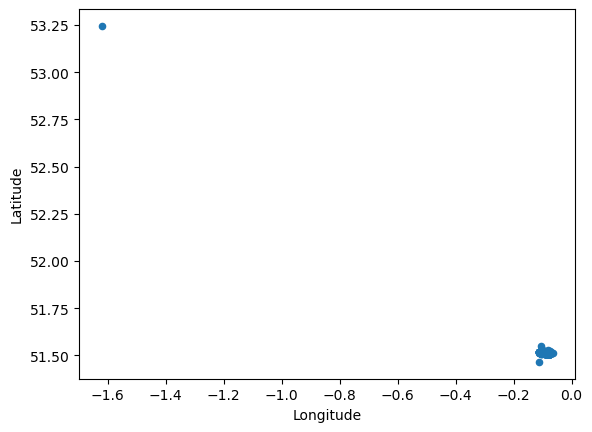

In [49]:
outcomes_located.plot.scatter('Longitude', 'Latitude');

Lets have a look if the visible outlier is valid data or not. We can use the `query()` method to filter the `outcomes_located` DataFrame to only show the rows where the `Longitude` value is less than -1 to see the data for this outlier.

In [50]:
outcomes_located.query('Longitude < -1')

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
414,f2f4e98933d44c23a63b983de32ef18f28de112cf5846b...,2019-07,City of London Police,City of London Police,-1.621245,53.245553,On or near Sports/Recreation Area,E01019606,Derbyshire Dales 002C,Investigation complete; no suspect identified


We can see that the outlier is outside of the City of London, so we can reverse our query to filter the `outcomes_located` DataFrame to only show the rows where the `Longitude` value is greater than -1 to see the data for London. In case this has unintended consequences, we can assign this to a new label, `london_located` so we can come back to the original data if we need to.

We can then use the `scatter()` method to plot the `Longitude` and `Latitude` columns against each other to see if there are still any obvious outliers.

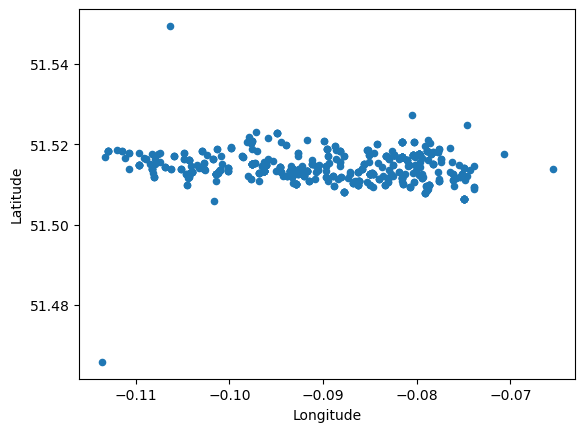

In [51]:
london_located = outcomes_located.query('Longitude > -1')
london_located.plot.scatter('Longitude', 'Latitude');

It looks like there still are some outliers, so we can use the `query()` method to filter the `london_located` DataFrame to only show the rows where the `Latitude` value is less than 51.49 to see the lower outliers.

In [52]:
london_located.query('Latitude < 51.49')

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
602,48181ac92e1d6914bce16aff37bd4ce25da4f7c765fb22...,2019-07,City of London Police,City of London Police,-0.113649,51.46578,On or near BRIXTON ROAD,E01003047,Lambeth 011B,Investigation complete; no suspect identified


As we are happy to discard this we can use the same approach as before to drop it from the `london_located` DataFrame and creating a new DataFrame called `london_located_north`. We can then use the `scatter()` method to plot the `Longitude` and `Latitude` columns against each other to see if there are still any obvious outliers.

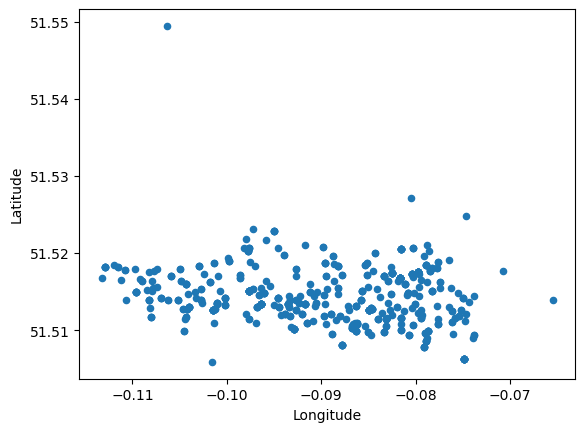

In [53]:
london_located_north = london_located.query('Latitude > 51.49')
london_located_north.plot.scatter('Longitude', 'Latitude');

It looks like there still are some outliers, so we can use the `query()` method to filter the `london_located` DataFrame to only show the rows where the `Latitude` value is greater than 51.525 to see the upper outliers.

In [54]:
london_located_north.query('Latitude > 51.525')

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,d916bdd10349bec542af76fca46dba9cd0bea4a0c522ef...,2019-07,City of London Police,City of London Police,-0.080478,51.527164,On or near Nightclub,E01033708,Hackney 027G,Suspect charged
294,6efa9288974495c41df0232fafe7f605ca9bb74222d1e2...,2019-07,City of London Police,City of London Police,-0.106353,51.549464,On or near FIELDWAY CRESCENT,E01002739,Islington 013A,Unable to prosecute suspect


As we are happy to discard this we can use the same approach as before to drop it from the `london_located_north` DataFrame and creating a new DataFrame called `london_located_central`. We can then use the `scatter()` method to plot the `Longitude` and `Latitude` columns against each other to see if there are still any obvious outliers.

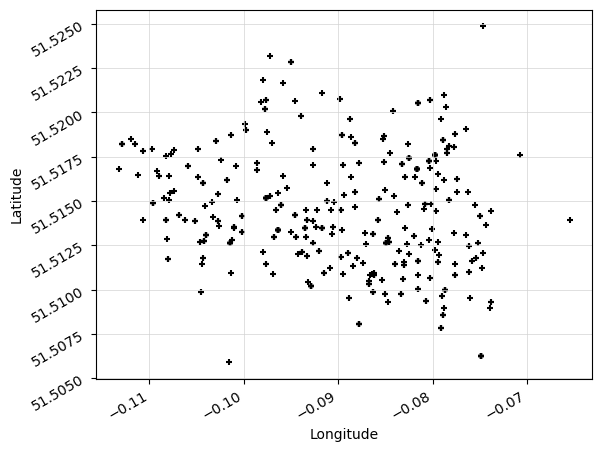

In [64]:
london_located_central = london_located_north.query('Latitude < 51.525')
london_located_central.plot.scatter('Longitude', 'Latitude', c='k', marker='+');
#for tick in ax.get_xticklabels():
#    tick.set_rotation(45)
plt.xticks(rotation=30, ha='right')
plt.yticks(rotation=30, ha='right')
plt.grid(color = 'lightgrey', linestyle = '-', linewidth = 0.5)

This data looks clean now, so we can move on to the next step.

### Export and explore data

Our task was the explore and prepare the data for the analysis. Now we have done that, we should save the DataFrame to a csv using the `to_csv()` method and the `data_folder` object we created earlier.

In [ ]:
london_located_central.to_csv(data_folder / '2019-07-city-of-london-outcomes_cleaned.csv')

Having done that, we can briefly explore the data more thoroughly by plotting it onto a map using `ipyleaflet`. To do so, we will need to find the centre of the map, which we can do by calculating:

$center = \frac{max + min}{2}$

Pandas has the `max()` and `min()` methods that we can use to calculate these.  

In [ ]:
map_center = (london_located_central[['Latitude', 'Longitude']].max() + london_located_central[['Latitude', 'Longitude']].min())/2
map_center_list = map_center.to_list()

To show all the data points on the map, we will need to create a marker for each crime location. We can do this using list comprehension to loop through the `london_located_central` DataFrame and creating a `Marker()` object for each row. We can then use the `MarkerCluster()` function from `ipyleaflet` to create a cluster of markers. 

In [ ]:
marker_list = [Marker(location=tuple(l), draggable=False) for l in london_located_central[['Latitude', 'Longitude']].values]
marker_cluster = MarkerCluster(markers=marker_list)

We can then use the `Map()` function from `ipyleaflet` to create a map centered on the City of London. To see it properly, we will zoom in to zoom level 13. We will also use the Open Street Map as the base map. Lastly, we can use the `add_layer()` method to add the cluster to the map. 

In [ ]:
m = Map(
    basemap=basemap_to_tiles(basemaps.OpenStreetMap.Mapnik),
    center=map_center_list,
    zoom=13
    )
m.add_layer(marker_cluster);

m